# Cry Baby Analyzer

## Part 1 - Data Preprocessing

### Convert Audio Files to WAV Format 

In [94]:
import os
import subprocess

def convert_audio_to_wav(input_dir, output_dir):
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate over all .m4a files in the input directory
    for filename in os.listdir(input_dir):
        if (filename.endswith(".m4a")) or (filename.endswith(".amr")):
            input_path = os.path.join(input_dir, filename)
            output_filename = os.path.splitext(filename)[0] + ".wav"
            output_path = os.path.join(output_dir, output_filename)
            
            # FFmpeg command to convert .m4a to .wav
            command = ["ffmpeg", "-i", input_path, output_path]
            
            # Run the FFmpeg command
            try:
                subprocess.run(command, check=True)
                print(f"Successfully converted {filename} to {output_filename}")
            except subprocess.CalledProcessError as e:
                print(f"Error converting {filename}: {e}")

# Change directories based on need
input_directory = "data_categorized.split"
output_directory = "data_wav-converted"

convert_audio_to_wav(input_directory, output_directory)

Successfully converted Voice_message_Micheal_Lee_008.amr to Voice_message_Micheal_Lee_008.wav


ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex 

### Extract Labels from File Names

In [24]:
# Import relevant libraries
import re

# Extract cry reasons and possible solutions from filename.
def extract_labels(filename):
    # Remove file number
    file_w_extension = filename.split(' ')[1]
    # Remove file extension
    filename = file_w_extension.split('.')[0]

    # Split by '-' to separate reasons and solutions
    parts = filename.split('-')

    # Extract reasons and solutions
    reason = parts[0].split('_')
    solution = parts[1].split('_')[0]

    return reason, solution

### Extract Audio Features from Audio Files

In [26]:
# Install relevant libraries
!pip install librosa pysoundfile audioread soundfile

# Import relevant libraries
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import glob
import random
import soundfile as sf

# Extract audio features from audio files
def extract_mel_spectrogram(file_path, n_mels=100, max_length=431):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)
    except Exception as e:
        print(f"Error loading audio file: {e}")
        return None, None
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    # Pad or trim to max_length
    if spectrogram_db.shape[1] > max_length:
        spectrogram_db = spectrogram_db[:, :max_length]
    elif spectrogram_db.shape[1] < max_length:
        pad_width = max_length - spectrogram_db.shape[1]
        spectrogram_db = np.pad(spectrogram_db, ((0, 0), (0, pad_width)), mode='constant')
    
    return spectrogram_db, spectrogram


def extract_mfcc(file_path, n_mfcc=100, max_length=431, hop_length=512):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)
    except Exception as e:
        print(f"Error loading audio file: {e}")
        return None, None
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc, hop_length=hop_length)
    
    # Pad or trim to max_length
    if mfccs.shape[1] > max_length:
        mfccs = mfccs[:, :max_length]
    elif mfccs.shape[1] < max_length:
        pad_width = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), mode='constant')
    
    return mfccs, mfccs


def plot_spectrogram(spectrogram, title='Mel Spectrogram', sr=22050, n_mels=128):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()


def plot_mfcc(mfcc, sr=22050, cmap='magma', contrast_factor=1.5, title='MFCC'):
    plt.figure(figsize=(10, 5))
     # Normalize the MFCC to boost contrast
    norm = Normalize(vmin=np.min(mfcc) * contrast_factor, vmax=np.max(mfcc) / contrast_factor)
    
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap=cmap, norm=norm)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

### Visualizing the Mel Spectrogram and MFCC Spectrogram

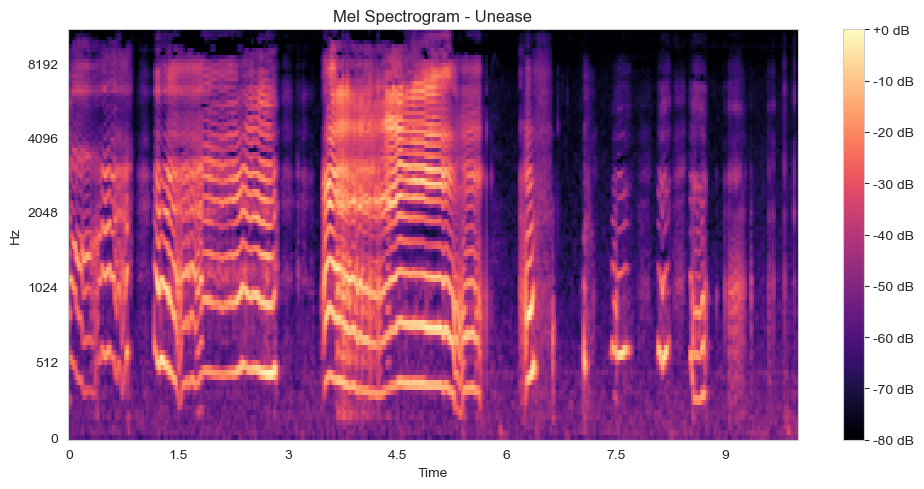

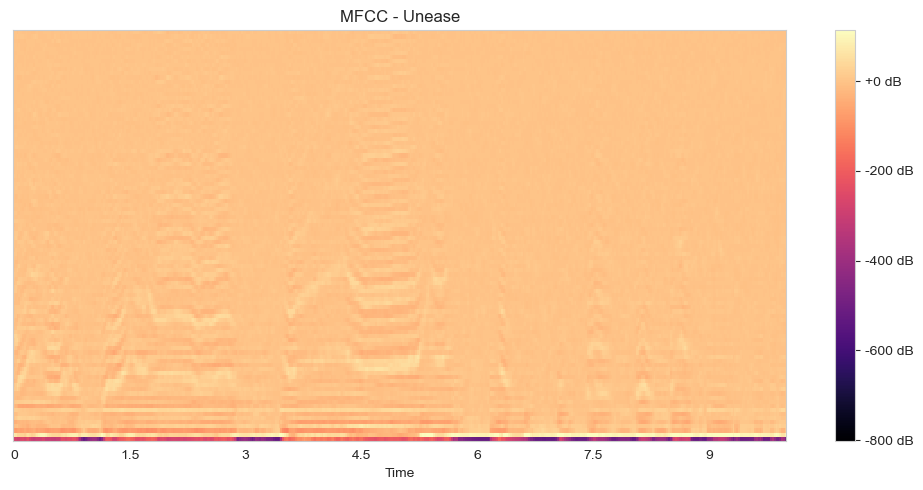

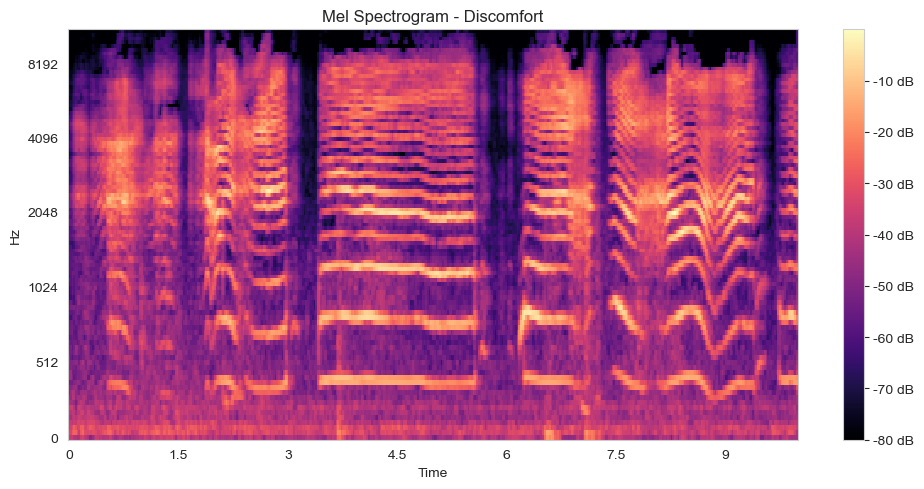

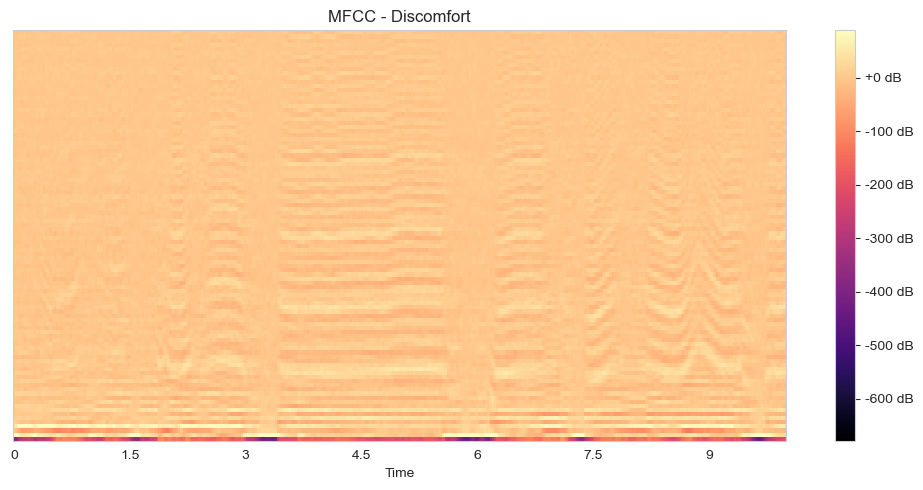

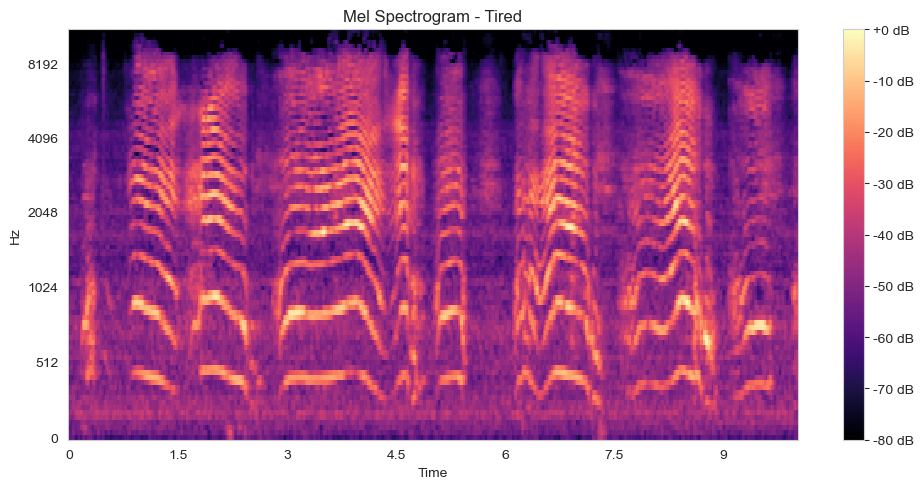

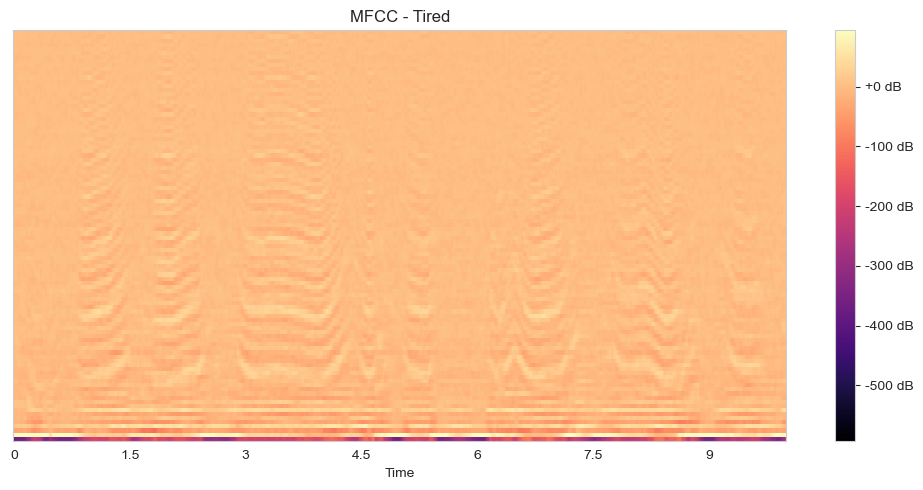

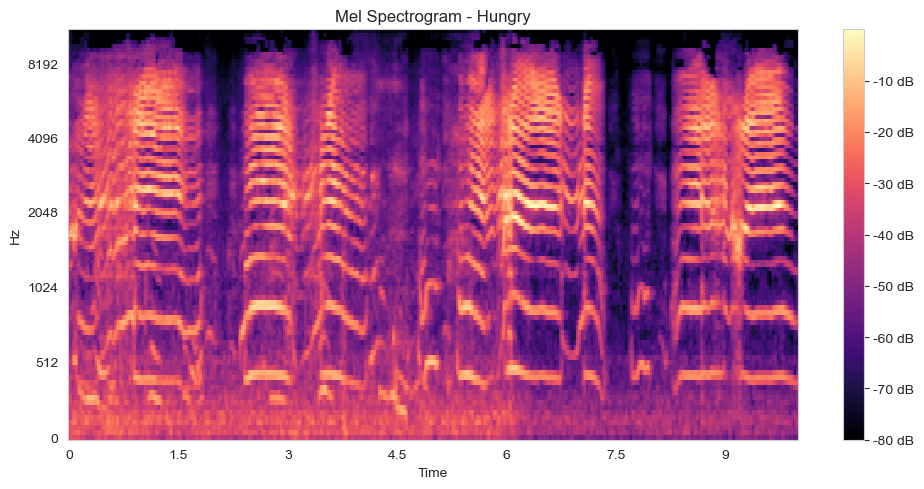

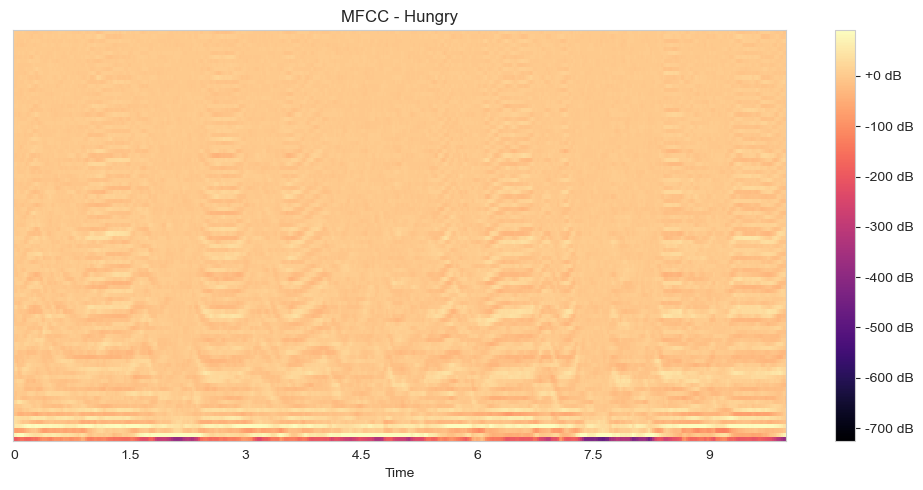

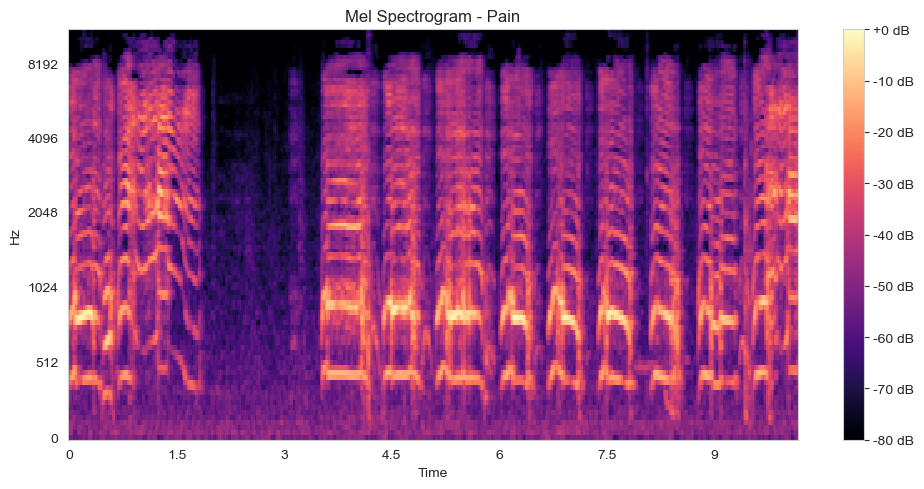

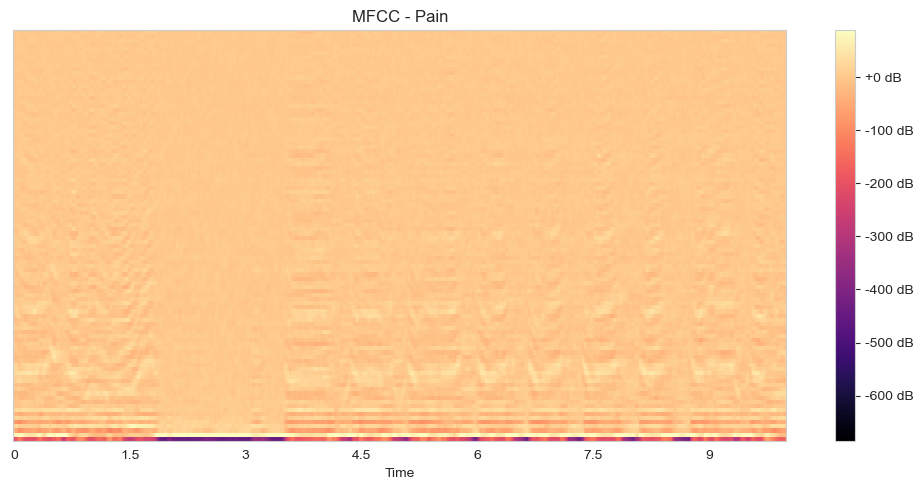

In [19]:
file_path = 'data_wav-converted/1.9.3 Unease-Adjust.wav'
spectrogram_db, raw_spectrogram = extract_mel_spectrogram(file_path)
mfccs, raw_mfccs = extract_mfcc(file_path)
plot_spectrogram(raw_spectrogram, title = 'Mel Spectrogram - Unease')
plot_mfcc(raw_mfccs, title='MFCC - Unease')

file_path = 'data_wav-converted/1.4.1 Discomfort-Adjust.wav'
spectrogram_db, raw_spectrogram = extract_mel_spectrogram(file_path)
mfccs, raw_mfccs = extract_mfcc(file_path)
plot_spectrogram(raw_spectrogram, title = 'Mel Spectrogram - Discomfort')
plot_mfcc(raw_mfccs, title='MFCC - Discomfort')

file_path = 'data_wav-converted/1.44.4 Tired-Sleep.wav'
spectrogram_db, raw_spectrogram = extract_mel_spectrogram(file_path)
mfccs, raw_mfccs = extract_mfcc(file_path)
plot_spectrogram(raw_spectrogram, title = 'Mel Spectrogram - Tired')
plot_mfcc(raw_mfccs, title='MFCC - Tired')

file_path = 'data_wav-converted/1.31.1 Hungry-Feed.wav'
spectrogram_db, raw_spectrogram = extract_mel_spectrogram(file_path)
mfccs, raw_mfccs = extract_mfcc(file_path)
plot_spectrogram(raw_spectrogram, title = 'Mel Spectrogram - Hungry')
plot_mfcc(raw_mfccs, title='MFCC - Hungry')

file_path = 'data_wav-converted/1.29 Pain-Soothe.wav'
spectrogram_db, raw_spectrogram = extract_mel_spectrogram(file_path) 
mfccs, raw_mfccs = extract_mfcc(file_path)
plot_spectrogram(raw_spectrogram, title = 'Mel Spectrogram - Pain')
plot_mfcc(raw_mfccs, title='MFCC - Pain')

### Audio Augmentation

In [9]:
# Add audio augmentation to each file
def augment_audio(file_path, sr=22050, time_stretch_range=(0.9, 1.1), pitch_shift_range=(-1, 1), noise_factor=0.005):
    audio, sample_rate = librosa.load(file_path, sr=sr)
    
    # Time stretching
    time_stretch = random.uniform(time_stretch_range[0], time_stretch_range[1])
    audio = librosa.effects.time_stretch(audio, rate= time_stretch)
    
    # Pitch shifting
    pitch_shift = random.randint(pitch_shift_range[0], pitch_shift_range[1])
    audio = librosa.effects.pitch_shift(audio, sr=sr, n_steps= pitch_shift)
    
    # Adding noise
    noise = np.random.randn(len(audio)) * noise_factor
    audio = audio + noise
    
    # Shifting time
    shift = np.random.randint(len(audio))
    audio = np.roll(audio, shift)
    
    # Volume control
    volume_change = random.uniform(0.8, 1.3)
    audio = audio * volume_change
    
    return audio
    
# Save augmented audio in a new file
def save_augmented_audio(input_path, output_path, sr=22050, n_augmentations=5):
    files = glob.glob(os.path.join(input_path, '*.wav'))
    
    for file in files:
        for i in range(n_augmentations):
            augmented_audio = augment_audio(file, sr=sr)
            output_file_name = f"{os.path.splitext(os.path.basename(file))[0]}_aug_{i}.wav"
            output_file_path = os.path.join(output_path, output_file_name)
            sf.write(output_file_path, augmented_audio, sr)

# Example usage
input_path = 'data_wav-converted'
output_path = 'data_wav-converted.augmented'
os.makedirs(output_path, exist_ok=True)

save_augmented_audio(input_path, output_path)

KeyboardInterrupt: 

### Load the Data

In [28]:
# Import relevant libraries
import random
import tensorflow as tf
import os
import pickle
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

def normalize(data, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    else:
        data = scaler.transform(data)
    return data, scaler

def resize_spectrogram(spectrogram, target_shape):
    return librosa.util.fix_length(spectrogram, size=target_shape)

# Set the seed for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load and preprocess data
def load_data(data_path, max_length=431):
    mel_spectrograms = []
    mfccs = []
    reason_labels = []
    solution_labels = []

    # Define scalers for Mel spectrogram and MFCC
    mel_spectrogram_scaler = None
    mfcc_scaler = None

    for file in glob.glob(os.path.join(data_path, '*.wav')):
        spectrogram_db, spectrogram = extract_mel_spectrogram(file, max_length=max_length)
        mfccs_features, raw_mfccs = extract_mfcc(file, max_length=max_length)
        
        if spectrogram_db is None or mfccs is None:
            continue

        # Resize the Mel spectrogram to match the MFCC shape
        spectrogram_db = resize_spectrogram(spectrogram_db, mfccs_features.shape[1])
        
        # Normalize Mel spectrograms and MFCCs to allow combining 
        spectrogram_db, mel_spectrogram_scaler = normalize(spectrogram_db.T, mel_spectrogram_scaler)  # Transpose for sklearn
        mfccs_features, mfcc_scaler = normalize(mfccs_features.T, mfcc_scaler)  # Transpose for sklearn
        
        reason, solution = extract_labels(os.path.basename(file))

        mel_spectrograms.append(spectrogram_db.T)  # Transpose back to original shape
        mfccs.append(mfccs_features.T)  # Transpose back to original shape
        reason_labels.append(reason)
        solution_labels.append(solution)

    mel_spectrograms = np.array(mel_spectrograms)
    mfccs = np.array(mfccs)
    reason_labels = np.array(reason_labels)
    solution_labels = np.array(solution_labels)
    
    mel_spectrograms = mel_spectrograms[..., np.newaxis]  # Adding channel dimension
    mfccs = mfccs[..., np.newaxis]  # Adding channel dimension

    return mel_spectrograms, mfccs, reason_labels, solution_labels, mel_spectrogram_scaler, mfcc_scaler


data_path = 'data_wav-converted.augmented'
mel_spectrograms, mfccs, reason_labels, solution_labels, mel_spectrogram_scaler, mfcc_scaler = load_data(data_path, max_length=431)
X_train_mel, X_train_mfcc = mel_spectrograms, mfccs

# Binarize the labels
mlb_reasons = MultiLabelBinarizer()
mlb_solutions = MultiLabelBinarizer()

y_reasons = mlb_reasons.fit_transform(reason_labels)
y_solutions = mlb_solutions.fit_transform(solution_labels)

# Save the encoders
with open('reason_encoder.pkl', 'wb') as f:
    pickle.dump(mlb_reasons, f)

with open('solution_encoder.pkl', 'wb') as f:
    pickle.dump(mlb_solutions, f)

with open('mel_spectrogram_scaler.pkl', 'wb') as f:
    pickle.dump(mel_spectrogram_scaler, f)

with open('mfcc_scaler.pkl', 'wb') as f:
    pickle.dump(mfcc_scaler, f)
    

### Visualizing the Cry Reasons and Solutions

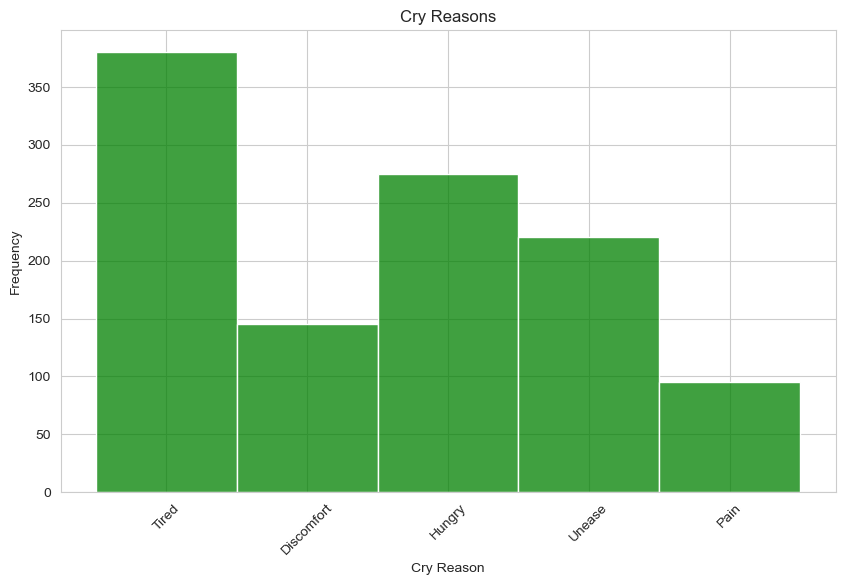

/var/folders/nw/m461n4tj7mdd4m5_j24g9rcw0000gn/T/ipykernel_1145/770018457.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cry Solutions', data=df, palette='viridis')


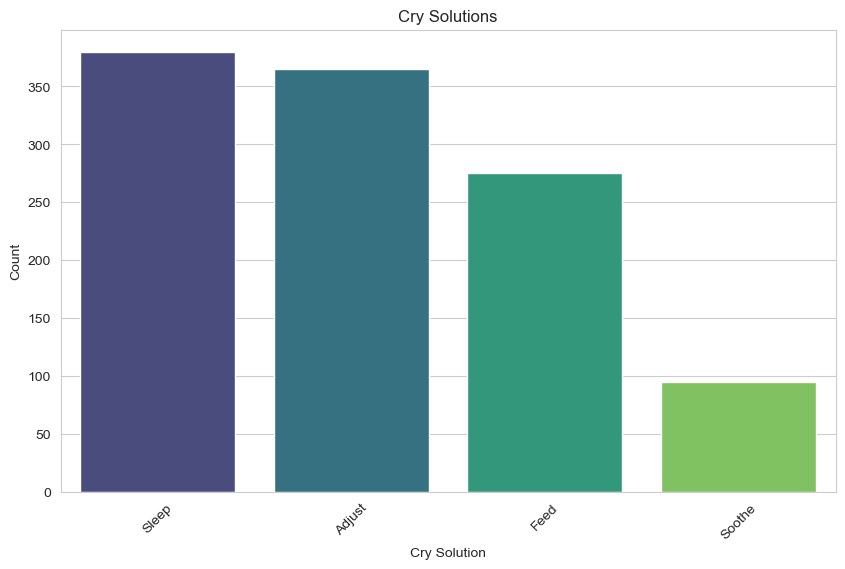

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

reason_labels = reason_labels.flatten()
solution_labels = solution_labels.flatten()

# Create a DataFrame
data = {
    'Cry Reasons': reason_labels,
    'Cry Solutions': solution_labels
}
df = pd.DataFrame(data)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the histogram for cry reasons
plt.figure(figsize=(10, 6))
sns.histplot(df['Cry Reasons'], kde=False, color='green', binwidth=1)
plt.title('Cry Reasons')
plt.xlabel('Cry Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot the bar chart for cry solutions
plt.figure(figsize=(10, 6))
sns.countplot(x='Cry Solutions', data=df, palette='viridis')
plt.title('Cry Solutions')
plt.xlabel('Cry Solution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Split the Data

In [30]:
# Import relevant libraries
from sklearn.model_selection import train_test_split

X_train_mel, X_test_mel, X_train_mfcc, X_test_mfcc, y_train_reasons, y_test_reasons = train_test_split(
    mel_spectrograms, mfccs, y_reasons, test_size=0.2, random_state=42)

## Part 2 - Build the Model

In [32]:
# Import relevant libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, concatenate, Reshape, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Create Multi-Input Model for Classification
def create_multi_input_model(input_shape_mfcc, input_shape_spectrogram, num_reasons):
    
    # Mel Spectrogram branch
    input_spectrogram = Input(shape=input_shape_spectrogram)
    
    # First Convolutional Block
    x1 = Conv2D(32, (3, 3), activation='relu')(input_spectrogram)
    x1 = MaxPooling2D((2, 2))(x1)
    x1 = Dropout(0.25)(x1)
    
    # Second Convolutional Block
    x1 = Conv2D(64, (3, 3), activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling2D((2, 2))(x1)
    x1 = Dropout(0.25)(x1)

    # Convert feature map to 1D feature vector
    x1 = GlobalAveragePooling2D()(x1)
    x1 = Dense(128, activation='relu')(x1)
    
    x1 = Model(inputs=input_spectrogram, outputs=x1)
    
    
    # MFCC branch
    input_mfcc = Input(shape=input_shape_mfcc)
    # Convert to 1D feature vector
    x2 = Flatten()(input_mfcc)
    x2 = Dense(128, activation='relu')(x2)
    x2 = Dense(64, activation='relu')(x2)
    
    x2 = Model(inputs=input_mfcc, outputs=x2)
    
    
    # Combine branches
    combined = concatenate([x1.output, x2.output])
    z = Dense(64, activation='relu')(combined)
    z = Dense(num_reasons, activation='sigmoid')(z)

    # Define the final model
    model = Model(inputs=[x1.input, x2.input], outputs=z)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create and compile the model
input_shape_mfcc = (X_train_mfcc.shape[1], X_train_mfcc.shape[2], X_train_mfcc.shape[3])
input_shape_spectrogram = (X_train_mel.shape[1], X_train_mel.shape[2], X_train_mel.shape[3])
num_reasons = y_train_reasons.shape[1]

model = create_multi_input_model(input_shape_mfcc, input_shape_spectrogram, num_reasons)


## Part 3 - Train the Model

### Training Day...

In [34]:
batch_size = 32
epochs = 10

# Train the model
history = model.fit(
    [X_train_mel, X_train_mfcc], 
    y_train_reasons, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_split=0.2
)

model.save('data_aug_reasons_model.keras')

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.2908 - loss: 0.5290 - val_accuracy: 0.4302 - val_loss: 0.4551
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.7310 - loss: 0.3125 - val_accuracy: 0.4749 - val_loss: 0.4364
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.9212 - loss: 0.1682 - val_accuracy: 0.4637 - val_loss: 0.4446
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.9861 - loss: 0.0926 - val_accuracy: 0.3743 - val_loss: 0.5381
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.9990 - loss: 0.0617 - val_accuracy: 0.4413 - val_loss: 0.5794
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.9932 - loss: 0.0524 - val_accuracy: 0.4246 - val_loss: 0.6160
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.9826 - loss: 0.0500 - val_accuracy: 0.4749 - val_loss: 0.5172
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.9915 - loss: 0.0279 - val_accuracy: 0.

## Part 4 - Evaluate the Model

### Model Accuracy

In [36]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate([X_test_mel, X_test_mfcc], y_test_reasons, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Test Loss: 0.5387225151062012, Test Accuracy: 0.46188339591026306


### k-Fold Cross Validation

In [82]:
# Import necessary libraries
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.models import clone_model

# Number of folds
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize variables to store results
fold_no = 1
acc_per_fold = []
loss_per_fold = []

# Loop over each fold
for train_index, val_index in kf.split(X_train_mel):
    # Split the data for this fold
    X_train_mel_fold, X_val_mel_fold = X_train_mel[train_index], X_train_mel[val_index]
    X_train_mfcc_fold, X_val_mfcc_fold = X_train_mfcc[train_index], X_train_mfcc[val_index]
    y_train_reasons_fold, y_val_reasons_fold = y_train_reasons[train_index], y_train_reasons[val_index]
    
    # Create the model for this fold
    input_shape_mfcc = (X_train_mfcc.shape[1], X_train_mfcc.shape[2], X_train_mfcc.shape[3])
    input_shape_spectrogram = (X_train_mel.shape[1], X_train_mel.shape[2], X_train_mel.shape[3])
    num_reasons = y_train_reasons.shape[1]

    # Build the model
    model = create_multi_input_model(input_shape_mfcc, input_shape_spectrogram, num_reasons)
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
   # Train the model
    history = model.fit(
        [X_train_mel_fold, X_train_mfcc_fold],
        y_train_reasons_fold,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=([X_val_mel_fold, X_val_mfcc_fold], y_val_reasons_fold)
    )

   # Evaluate the model
    scores = model.evaluate([X_val_mel_fold, X_val_mfcc_fold], y_val_reasons_fold)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    
    fold_no += 1

# Print the results
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.3385 - loss: 0.5880 - val_accuracy: 0.4860 - val_loss: 0.4164
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.7755 - loss: 0.2776 - val_accuracy: 0.5363 - val_loss: 0.5068
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.9529 - loss: 0.0899 - val_accuracy: 0.5698 - val_loss: 0.4626
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.9958 - loss: 0.0275 - val_accuracy: 0.5698 - val_loss: 0.5679
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.5140 - val_loss: 0.6306
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.5922 - val_loss: 0.5957
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 1.0000 - loss: 9.9089e-04 - val_accuracy: 0.5754 - val_loss: 0.6232
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 261ms/step - accuracy: 1.0000 - loss: 6.7056e-04 - val_accu

### Visualizing the Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

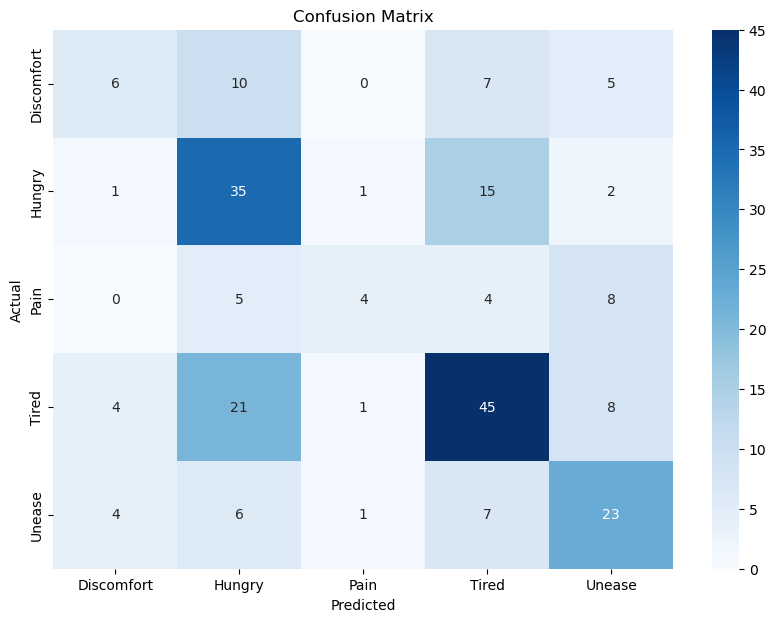

In [72]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Function to preprocess the input data
def preprocess_input(audio_file_path, mel_spectrogram_scaler, mfcc_scaler):
    mel_spectrogram_db, _ = extract_mel_spectrogram(audio_file_path)
    mfccs, _ = extract_mfcc(audio_file_path)

    # Check if feature extraction was successful
    if mel_spectrogram_db is None or mfccs is None:
        raise ValueError("Feature extraction failed. Check the audio file and try again.")

    # Normalize features
    mel_spectrogram_db = mel_spectrogram_scaler.transform(mel_spectrogram_db.T).T
    mfccs = mfcc_scaler.transform(mfccs.T).T

    # Expand dimensions to match the model's expected input shape
    mel_spectrogram_db = np.expand_dims(mel_spectrogram_db, axis=0)  # Add batch dimension
    mel_spectrogram_db = np.expand_dims(mel_spectrogram_db, axis=-1)  # Add channel dimension

    mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension
    mfccs = np.expand_dims(mfccs, axis=-1)  # Add channel dimension

    return mel_spectrogram_db, mfccs

# Load the model
model = load_model('data_aug_reasons_model.keras')

# Load the scalers
with open('mel_spectrogram_scaler.pkl', 'rb') as f:
    mel_spectrogram_scaler = pickle.load(f)

with open('mfcc_scaler.pkl', 'rb') as f:
    mfcc_scaler = pickle.load(f)

# Load the reason encoder
with open('reason_encoder.pkl', 'rb') as f:
    reason_encoder = pickle.load(f)
    
# Making predictions on the test set
y_pred = []
y_true = []

for i in range(len(X_test_mel)):
    mel_spectrogram_db = X_test_mel[i].reshape(1, X_test_mel.shape[1], X_test_mel.shape[2], 1)
    mfccs = X_test_mfcc[i].reshape(1, X_test_mfcc.shape[1], X_test_mfcc.shape[2], 1)
    
    predictions = model.predict([mel_spectrogram_db, mfccs])
    predicted_reason_index = np.argmax(predictions[0])
    y_pred.append(predicted_reason_index)
    y_true.append(np.argmax(y_test_reasons[i]))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=reason_encoder.classes_, yticklabels=reason_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Single Prediction

In [38]:
# Load the encoders
with open('reason_encoder.pkl', 'rb') as f:
    reason_encoder = pickle.load(f)

with open('solution_encoder.pkl', 'rb') as f:
    solution_encoder = pickle.load(f)

# Load the scalers
with open('mel_spectrogram_scaler.pkl', 'rb') as f:
    mel_spectrogram_scaler = pickle.load(f)

with open('mfcc_scaler.pkl', 'rb') as f:
    mfcc_scaler = pickle.load(f)
    
# Load the model
model = tf.keras.models.load_model('data_aug_reasons_model.keras')

#### Choose Audio File to Predict

In [64]:
# CHOOSE AN AUDIO FILE TO VIEW A PREDICTION

audio_file_path = 'prediction/1.9.1 Unease-Adjust.wav'
# audio_file_path = 'prediction/1.19.5 Pain-Soothe.wav'
# audio_file_path = 'prediction/1.25.2 Hungry-Feed.wav'
# audio_file_path = 'prediction/1.34.2 Discomfort-Adjust.wav'
# audio_file_path = 'prediction/1.36.1 Tired-Sleep.wav'

#*************************************************************************#

# Extract and preprocess features from audio file
mel_spectrogram_db, _ = extract_mel_spectrogram(audio_file_path)
mfccs, _ = extract_mfcc(audio_file_path)

# Normalize features
mel_spectrogram_db = mel_spectrogram_scaler.transform(mel_spectrogram_db.T).T
mfccs = mfcc_scaler.transform(mfccs.T).T

# Check if feature extraction was successful
if mel_spectrogram_db is None or mfccs is None:
    raise ValueError("Feature extraction failed. Check the audio file and try again.")

    
# Expand dimensions to match the model's expected input shape
mel_spectrogram_db = np.expand_dims(mel_spectrogram_db, axis=0)  # Add batch dimension
mel_spectrogram_db = np.expand_dims(mel_spectrogram_db, axis=-1)  # Add channel dimension

mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension
mfccs = np.expand_dims(mfccs, axis=-1)  # Add channel dimension

# Make a prediction
predictions = model.predict([mel_spectrogram_db, mfccs])

# Prediction Probabilities
reason_predictions = predictions[0]  # First output: reasons

# Sort the predictions
sorted_indices = np.argsort(reason_predictions)[::-1]  # Sort in descending order
sorted_predictions = reason_predictions[sorted_indices]
sorted_reasons = reason_encoder.inverse_transform(np.eye(reason_predictions.shape[0])[sorted_indices])

# Apply a threshold to convert predictions to binary format (0 or 1)
predicted_reason = (reason_predictions > 0.3).astype(int)

# Find the index of the reason with the highest probability
predicted_reason_index = np.argmax(reason_predictions)

# Convert predicted_reason_index to a one-hot encoded matrix
predicted_reason_one_hot = np.zeros((1, reason_predictions.shape[0]))
predicted_reason_one_hot[0, predicted_reason_index] = 1

# Decode the predictions
predicted_reason_array = np.array([predicted_reason])
decoded_reasons = reason_encoder.inverse_transform(predicted_reason_array)

decoded_top_reason = reason_encoder.inverse_transform(predicted_reason_one_hot)

print(f"\n    Predicted Reason(s)\t\t(Probabilities):")
for i, v in enumerate(sorted_predictions):
    print(f'\t{sorted_reasons[i]}\t\t\t{v * 100:.2f}%')
            
# Extract actual reason and solution (assuming you have a function for this)
actual_reason, actual_solution = extract_labels(audio_file_path)
print(f'\nActual Reason: {actual_reason}')
print(audio_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

    Predicted Reason(s)		(Probabilities):
	('Unease',)			66.32%
	('Tired',)			27.26%
	('Discomfort',)			0.12%
	('Hungry',)			0.09%
	('Pain',)			0.00%

Actual Reason: ['Unease']
prediction/1.9.1 Unease-Adjust.wav
